# Métodos de Aprendizaje Automático Supervisado

 *Anthony Vega Padilla, 201258956*
 
 <br>
 <br>
 
 Los métodos de aprendizaje supervisado se conocen de esta forma porque aun requieren de intervención humana para ser entrenados de acuerdo a información previamente conocida, es decir, brindar asistencia al algoritmo sobre las conclusiones que éste debe proporcionar.
 
En este documento vamos a revisar algunos algoritmos utilizados frecuentemente, el *dataset* usado se puede obtener en **https://www.kaggle.com/pavanraj159/predicting-a-pulsar-star/**. Este *dataset* consiste en una serie de mediciones de diferentes parámetros estudiados en astronomía para detectar un "púlsar" o estrella de neutrones.


In [2]:
#Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Requerido para utilizar graficos 
%matplotlib inline

#Cargar el dataset
filename = "pulsar_stars.csv"
pulsar = pd.read_csv(filename)

In [6]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Una vez cargador el *dataset* se debe hacer la selección de los *features* y los *labels, que corresponden respectivamente a los atributos que se van a usar como entrada para la predicción y a las clases de salida.

In [5]:
#Seleccionar los inputs y outputs del modelo
features = pulsar[pulsar.columns.tolist()[:-1]]
labels = pulsar[pulsar.columns.tolist()[-1:]]

# 1. KNN Classifier

*K-nearest neighbors* es un algoritmo de clasificación, donde el valor de K representa el número de vecinos (otras instancias) que tienen peso en la clasificación de la instancia actual. Es decir, si K=3 se tomarán en cuenta las 3 instancias con los atributos mas cercanos o similares y éstas asignan la clase de salida según la votación. 

Para este ejemplo, se hace un barrido del hiper-parámetro K en el rango de 1 a 10, para comparar los puntajes del modelo.

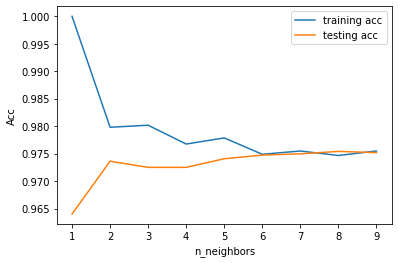

In [7]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=23)

training_acc = []
testing_acc = []

Y_train = Y_train.values.ravel()

neighbors_settings = range(1,10)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, Y_train)
    training_acc.append(clf.score(X_train, Y_train))
    testing_acc.append(clf.score(X_test, Y_test))
plt.plot(neighbors_settings,training_acc, label="training acc")
plt.plot(neighbors_settings,testing_acc, label="testing acc")
plt.ylabel("Acc")
plt.xlabel("n_neighbors")
plt.legend()

De acuerdo con la figura, se observa que para valores pequeños de K se produce *overfitting* es decir, tenemos un modelo muy complejo que se ajusta perfectamente a los datos de entrenamiento pero no generaliza de forma adecuada. Conforme se incrementa K, se alcanza la condición *fit* donde ambos puntajes son muy cercanos. Este comportamiento se mantiene relativamente estable para K > 6.

# 2. Linear Regression

La regresión lineal es un método estadístico que se utiliza para estudiar o establecer alguna relación entre dos variables continuas, es decir se vuelve especialmente util para regresión y no tanto para clasificación. Por este motivo, en este ejemplo al estar usando como objetivo una clase binaria, no se espera un puntaje tan alto como en el método anterior.

In [9]:
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=13)

lr = LinearRegression().fit(X_train, Y_train)

print("Training set score: {:.3f}".format(lr.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, Y_test)))

Training set score: 0.680
Test set score: 0.691


La regresión lineal tiene la ventaja de que es muy poco probable que genere *overfitting*, esto queda evidenciado con los puntajes obtenidos. Sin embargo, comparado con el puntaje de KNN es bastante inferior.

# 3. Logistic Regression

No se debe confundir con los métodos de regresión para predecir variables continuas. Aunque su nombre diga regresión, este método utiliza una clasificación binaria, por medio de la aplicación de la una función sigmoide.

Al variar el hiper-parámetro C, controlamos la regularización. Para los valores altos, se espera que modelo tienda a optimizar el puntaje de entrenamiento. Se debe ser cuidadoso con este ajuste para no inducir *overfitting*

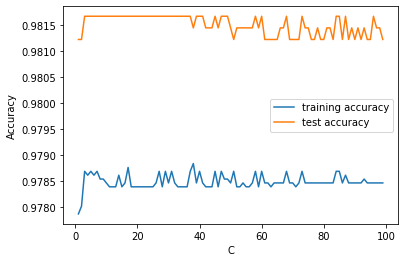

In [8]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=13)

training_acc = []
test_acc = []

Y_train = Y_train.values.ravel()

rango = range(1, 100)
for c in rango:
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    training_acc.append(clf.score(X_train, Y_train))
    test_acc.append(clf.score(X_test, Y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

La regresión logística constituye un caso especial de la regresión lineal y como se mencionó antes, con ligeros ajustes para la predicción se puede obtener un clasificador de rendimiento comparable con KNN. Para este ejemplo se observa que el efecto de la regularización es bastante bajo en este *dataset*.

# 4. Naive Bayes

Naive Bayes es un clasificador probabilístico que está basado en el teorema de Bayes pero incluye algunas suposiciones para simplificación. Dichas suposiciones asumen que los atributos de entrada son independientes. Este clasificador tiene algunas variantes que dependen de como se asuma la distribución de probabilidad de las entradas, puede ser gaussiana, multinomial, Bernoulli, entre otras.

Para este caso se comparan dos de ellos, Gaussian y Bernoulli.

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=13)

Y_train = Y_train.values.ravel()

nbg = GaussianNB().fit(X_train, Y_train)
nbb = BernoulliNB().fit(X_train, Y_train)

print("Gaussian Training set score: {:.3f}".format(nbg.score(X_train, Y_train)))
print("Gaussian Test set score: {:.3f}".format(nbg.score(X_test, Y_test)))

print("\nBernoulli Training set score: {:.3f}".format(nbb.score(X_train, Y_train)))
print("Bernoulli Test set score: {:.3f}".format(nbb.score(X_test, Y_test)))


Gaussian Training set score: 0.944
Gaussian Test set score: 0.949

Bernoulli Training set score: 0.923
Bernoulli Test set score: 0.925


Los predictores también se puede validar utilzando el siguiente cálculo:

In [20]:
y_pred_g = nbg.fit(features, labels.values.ravel()).predict(features)
print("Number of mislabeled points using Gaussian: %d out of a total %d "
      % ((labels.values.ravel() != y_pred_g).sum(), features.shape[0]))

y_pred_b = nbb.fit(features, labels.values.ravel()).predict(features)
print("\nNumber of mislabeled points using Bernoulli: %d out of a total %d "
      % ((labels.values.ravel() != y_pred_b).sum(), features.shape[0]))

Number of mislabeled points using Gaussian: 980 out of a total 17898 

Number of mislabeled points using Bernoulli: 1365 out of a total 17898 


Como se observa en los resultados, el puntaje de Naive Bayes Gaussiano solo es ligeramente mayor, es decir, que un método ofrezca un puntaje alto no es excluyente con las otras variantes. En este caso el predictor de Bernoulli también proporciona un modelo bastante preciso.

# 5. Decision Tree

full_tree accuracy on training set: 1.000
full_tree accuracy on test set: 0.971


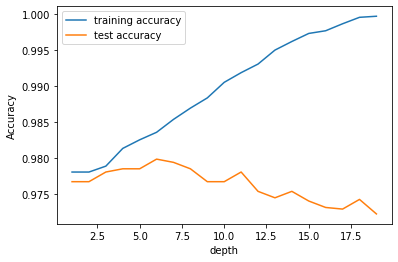

In [39]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=42)

full_tree = DecisionTreeClassifier(random_state=0)
full_tree.fit(X_train, Y_train.astype('int'))

print("full_tree accuracy on training set: {:.3f}".format(full_tree.score(X_train, Y_train.astype('int'))))
print("full_tree accuracy on test set: {:.3f}".format(full_tree.score(X_test, Y_test.astype('int'))))

training_acc = []
test_acc = []

depth = range(1, 20)
for d in depth:
    custom_tree = DecisionTreeClassifier(max_depth=d,random_state=0)
    custom_tree.fit(X_train, Y_train.astype('int'))
    training_acc.append(custom_tree.score(X_train, Y_train))
    test_acc.append(custom_tree.score(X_test, Y_test))
plt.plot(depth, training_acc, label="training accuracy")
plt.plot(depth, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("depth")
plt.legend()

Para el primer caso, se puede notar que el puntaje de entrenamiento es perfecto, esto porque el arbol crece de forma ilimitada hasta ajustarse de forma perfecta con el *dataset*, lo que se conoce como un arbol puro. Para evitar esto, se puede especificar alguna restricción como por ejemplo la profundidad (cantidad de preguntas o decisiones). 

Al tener un ábol con profundidad limitada, se logra obtener un puntaje aceptable sin caer en *overfit*, conforme se añaden niveles se observa como esto empieza a suceder.

# 6. Random Forest

## Aprendizaje Conjunto

Los metodos de aprendizaje conjunto son aquellos que utilizando varios algoritmos distintos de forma combinada o simultánea para obtener un rendimiento mejor que los que son posibles en cada uno de dichos algoritmos por si solos. Esta combinación permite general modelos predictivos mas eficientes y flexibles.

*Random Forest* es un ejemplo clásico y muy intuitivo del concepto de aprendizaje conjunto. En este modelo los datos se separan en subconjuntos y se realiza un seleccion aleatoria de atributos y para cada subconjunto se implementa un arbol completamente independiente. De este modo, se consigue un grupo numeroso de arboles no correlacionados que al final del proceso son promediados para obtener la clasificación final.

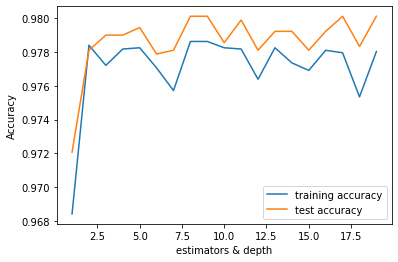

In [54]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, random_state=34)

Y_train = Y_train.values.ravel()

training_acc = []
test_acc = []

estimators = range(1, 20)
for e in estimators:
    rf = RandomForestClassifier(n_estimators=e, max_depth=3).fit(X_train, Y_train.astype('int'))
    training_acc.append(rf.score(X_train, Y_train))
    test_acc.append(rf.score(X_test, Y_test))
plt.plot(estimators, training_acc, label="training accuracy")
plt.plot(estimators, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("estimators & depth")
plt.legend()


Para este caso, como era esperable el rendimiento del Random Forest es bastante bueno, incluso variando la cantidad de estimadores el puntaje varía en un porcentaje bajo. Para la primera iteración se tendría el caso de un arbol simple, por eso se nota el incremento a partir de 2 cuando ya se cuenta realmente con un *Random Forest* y luego la variación no es significativa. El parámetro *depth* se mantiene constante ya que como se vió en el ejemplo anteriors, al agregar mucha profundidad se puede caer en un arbol puro y producir *overfitting*